# This file runs on ***Google Colab***
## Before running this file, the Data File needs to be placed at the same level as this file

### Data file: ../PySpark_DataFile/hotel_reviews_for_NLP3_3categories_review_score.zip/hotel_reviews_for_NLP3_3categories_review_score.csv


In [1]:
# Import our dependencies
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [2]:
# Reading data into a pandas DataFrame
df = pd.read_csv('hotel_reviews_for_NLP3_3categories_review_score.csv')
df

,Review,Review_Category
0,I am so angry that i made this post available...,Bad
1,No real complaints the hotel was great great ...,Good
2,Rooms are nice but for elderly a bit difficul...,Average
3,My room was dirty and I was afraid to walk ba...,Bad
4,You When I booked with your company on line y...,Average
...,...,...
512338,no trolly or staff to help you take the lugga...,Average
512339,The hotel looks like 3 but surely not 4 Brea...,Average
512340,The ac was useless It was a hot week in vienn...,Bad
512341,The rooms are enormous and really comfortable...,Good


In [3]:
# Encoding 'reviewer_sentiment'
le = LabelEncoder()
df['Review_Category'] = le.fit_transform(df['Review_Category'])
df

,Review,Review_Category
0,I am so angry that i made this post available...,1
1,No real complaints the hotel was great great ...,2
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0
...,...,...
512338,no trolly or staff to help you take the lugga...,0
512339,The hotel looks like 3 but surely not 4 Brea...,0
512340,The ac was useless It was a hot week in vienn...,1
512341,The rooms are enormous and really comfortable...,2


In [4]:
# Split our preprocessed data into our features/input and target/output arrays
y = df['Review_Category'].values
X = df.drop(['Review_Category'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
# Compile, Train and Evaluate the Model
model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[8], input_shape=[], dtype=tf.string, trainable=True)
model = tf.keras.Sequential()

# First hidden layer
model.add(hub_layer)

# Second hidden layer
model.add(tf.keras.layers.Dense(units=3, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 3)                 63        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 400,087
Trainable params: 400,087
Non-trainable params: 0
_________________________________________________________________


In [6]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [7]:
# Fit/Train the model
fit_model = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
12009/12009 [==============================] - 113s 9ms/step - loss: -0.2794 - accuracy: 0.0311
Epoch 2/10
12009/12009 [==============================] - 110s 9ms/step - loss: -0.2832 - accuracy: 0.0311
Epoch 3/10
12009/12009 [==============================] - 111s 9ms/step - loss: -0.2832 - accuracy: 0.0311
Epoch 4/10
12009/12009 [==============================] - 112s 9ms/step - loss: -0.2833 - accuracy: 0.0311
Epoch 5/10
12009/12009 [==============================] - 116s 10ms/step - loss: -0.2834 - accuracy: 0.0311
Epoch 6/10
12009/12009 [==============================] - 117s 10ms/step - loss: -0.2836 - accuracy: 0.0311
Epoch 7/10
12009/12009 [==============================] - 119s 10ms/step - loss: -0.2838 - accuracy: 0.0311
Epoch 8/10
12009/12009 [==============================] - 115s 10ms/step - loss: -0.2842 - accuracy: 0.0311
Epoch 9/10
12009/12009 [==============================] - 116s 10ms/step - loss: -0.2846 - accuracy: 0.0311
Epoch 10/10
12009/12009 [=======

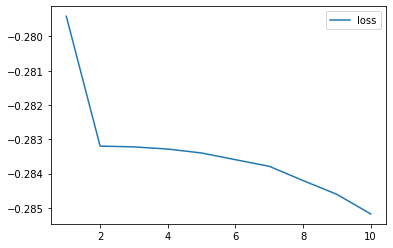

In [8]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

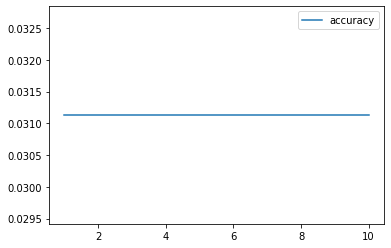

In [9]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [10]:
# Test/Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4003/4003 - 8s - loss: -2.8293e-01 - accuracy: 0.0310
Loss: -0.28293201327323914, Accuracy: 0.031026029959321022


In [11]:
# Export our model to HDF5 file
model.save("SavedModel4_NLP_DL_Review_in_3Category_Format.h5")